In [1]:
import pandas as pd
import openpyxl as xl

In [2]:
df = pd.read_excel("newsubmission.xlsx",sheet_name="sub")

problem = dict()
prb_with_user=dict()
prev =df["User Name"][0]
prev_prblm=df["Problem"][0]
prev_result=df["Result"][0]
print(prev_result,prev,prev_prblm)
for i in range(len(df)):
    if(df["Problem"][i] not in problem):
        problem[df["Problem"][i]]=[1,1] # first index denotes attempts and second index denotes no of user
        l=list()
        l.append(df["User Name"][i])
        prb_with_user[df["Problem"][i]]=l # two dict were maintained 1) prbl:[attm:user_count] 2) prblm: [user_name]
    else:
        if df["User Name"][i] not in prb_with_user[df["Problem"][i]]:
            l = problem[df["Problem"][i]]
            l[0]+=1
            l[1]+=1
            problem[df["Problem"][i]]=l
            l=prb_with_user[df["Problem"][i]]
            l.append(df["User Name"][i])
            prb_with_user[df["Problem"][i]] = l

        else:    # problem exits in dict and with same user
            if((prev_prblm!=df["Problem"][i]) or (prev_result!="Right Answer")):
                l = problem[df["Problem"][i]]
                l[0] += 1
                problem[df["Problem"][i]] = l
    prev=df["User Name"][i]
    prev_result=df["Result"][i]
    prev_prblm=df["Problem"][i]
    if(prev_result=="Right Answer"):
        while(i < len(df) and prev_prblm==df["Problem"][i]):
            i+=1
        i-=1


Partially Accepted maroonrk POLYEVAL


In [3]:
accpected=list()

dfs = pd.read_excel("newsubmission.xlsx")
user={}
user_tot_att={}
problems={}                            # user ={ "name":{"prblm":no_of atmp , "prblm" : no_of_atmp},"name2...."}
prev=dfs["User Name"][0]
prev_prblm=dfs["Problem"][0]
prev_result=dfs["Result"][0]

for i in range(len(df)):
    if prev !=dfs["User Name"][i]:
       # print(prev,problems)
        user[prev]=problems
        problems={}
        accpected=list()
        problems[dfs["Problem"][i]]=1
    else:
        if dfs["Problem"][i] not in problems:
            problems[dfs["Problem"][i]]=1
        elif dfs["Problem"][i] not in accpected:
            problems[dfs["Problem"][i]] += 1

    if dfs["Result"][i]=="Right Answer":
        accpected.append((dfs["Problem"][i]))
    prev=dfs["User Name"][i]
user[prev]=problems
#print(user)
for i in user.keys():
    prblms =0
    tot_prblm=user[i]
    for j in tot_prblm.keys():
        prblms+=tot_prblm[j]
    user_tot_att[i]=prblms

In [4]:
problems_pos=list(problem.keys())
print(len(problems_pos))

5822


In [5]:
#for  i in user:

def points(val):
    if val<0.25:
        ans =1
    elif val<0.5:
        ans=2
    elif val<1.0:
        ans=3
    elif val <2:
        ans=4
    else:
        ans=5
    return ans;

#for  i in user.keys(): 
# names=user[i]
def ratings(names):
  
    #print(i,end=" ")
    tot=0
    for j in user[names].keys():
        point1=problem[j][0]/problem[j][1]
        point1=point1/user[names][j]
        
        point2 =user_tot_att[names]/len(user[names])
        point2= point2/user[names][j]
        point = points(point1)+points(point2)
        tot+=point
        print(f"{problems_pos.index(j)}[{point}] {-1}",end=" ")
    print(f"-2 SUtility:{tot}\n")
        
      
    

     Unnamed: 0         0         1         2         3         4         5  \
0             0  1.000000  0.528079  0.495487  0.552771  0.353704  0.563067   
1             1  0.528079  1.000000  0.458748  0.427908  0.400250  0.510405   
2             2  0.495487  0.458748  1.000000  0.397740  0.357664  0.451633   
3             3  0.552771  0.427908  0.397740  1.000000  0.203135  0.526051   
4             4  0.353704  0.400250  0.357664  0.203135  1.000000  0.340614   
..          ...       ...       ...       ...       ...       ...       ...   
188         188  0.057735  0.133388  0.092880  0.145065  0.097243  0.045787   
189         189  0.000000  0.080845  0.078811  0.000000  0.103142  0.000000   
190         190  0.035635  0.088209  0.034396  0.053722  0.045015  0.063586   
191         191  0.000000  0.057166  0.000000  0.000000  0.000000  0.022893   
192         192  0.000000  0.114332  0.000000  0.000000  0.000000  0.068680   

            6         7         8  ...       183   

C:\Users\mithu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mithu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mithu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mithu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

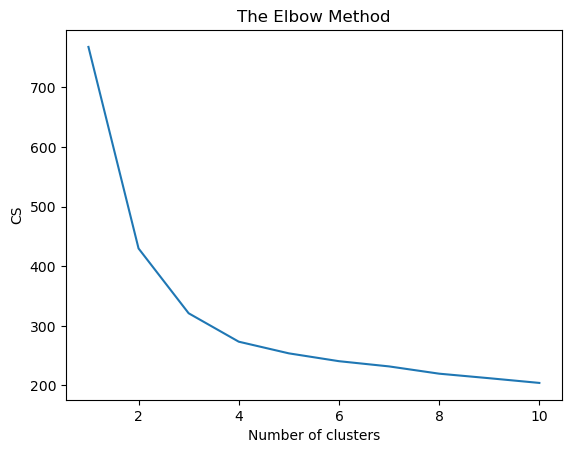

[767.9634853201128, 429.79726869818876, 321.02604155829727, 273.3378581442531, 253.7708982183418, 240.6243665907679, 231.8600495272829, 219.6572474758543, 212.0454546161846, 204.1499868958732]


C:\Users\mithu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mithu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0,
       3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 1,
       3, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       3, 2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 2, 1, 2, 1, 1, 2])

array([0, 1, 2, 3])

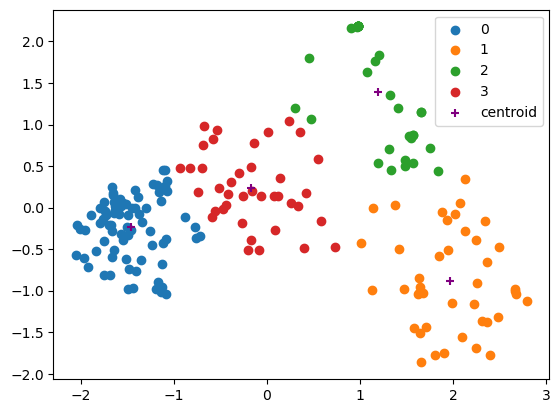

In [6]:
import clustering as cls

In [7]:
group =cls.clusters()


In [8]:
for i in group[1]:
    ratings(i)

0[3] -1 1[6] -1 2[9] -1 3[9] -1 4[8] -1 5[3] -1 6[8] -1 7[8] -1 8[9] -1 9[9] -1 10[8] -1 11[7] -1 12[9] -1 13[8] -1 14[8] -1 15[8] -1 16[9] -1 17[7] -1 18[8] -1 19[8] -1 20[8] -1 21[9] -1 22[9] -1 23[9] -1 24[8] -1 25[9] -1 26[9] -1 27[9] -1 28[9] -1 29[8] -1 30[8] -1 31[7] -1 32[9] -1 33[9] -1 34[9] -1 35[8] -1 36[7] -1 37[9] -1 38[9] -1 39[9] -1 40[8] -1 41[9] -1 42[9] -1 43[9] -1 44[8] -1 45[9] -1 46[9] -1 47[8] -1 48[9] -1 49[8] -1 50[8] -1 51[8] -1 52[8] -1 53[7] -1 54[5] -1 55[8] -1 56[6] -1 57[6] -1 58[9] -1 59[6] -1 60[5] -1 61[9] -1 62[8] -1 63[9] -1 64[7] -1 65[6] -1 66[6] -1 67[8] -1 68[8] -1 69[9] -1 70[6] -1 71[8] -1 72[7] -1 73[9] -1 74[9] -1 75[7] -1 76[8] -1 77[8] -1 78[7] -1 79[7] -1 80[8] -1 81[8] -1 82[8] -1 83[9] -1 84[8] -1 85[8] -1 86[9] -1 87[9] -1 88[7] -1 89[8] -1 90[6] -1 91[8] -1 92[7] -1 93[6] -1 94[7] -1 95[6] -1 96[8] -1 97[9] -1 98[9] -1 99[8] -1 100[8] -1 101[8] -1 102[8] -1 103[8] -1 104[7] -1 105[9] -1 106[9] -1 107[8] -1 108[8] -1 109[8] -1 110[8] -1 

290[9] -1 3103[7] -1 3104[9] -1 3105[7] -1 3106[5] -1 3107[7] -1 3108[7] -1 3109[8] -1 3110[7] -1 3111[7] -1 3112[9] -1 3113[9] -1 3114[8] -1 954[9] -1 955[9] -1 3115[10] -1 1601[9] -1 1602[9] -1 1600[9] -1 2559[6] -1 2560[10] -1 3116[6] -1 3117[9] -1 3118[9] -1 3119[10] -1 3120[9] -1 3121[9] -1 3122[6] -1 3123[9] -1 1918[9] -1 1348[9] -1 3124[9] -1 1577[5] -1 1378[4] -1 1379[10] -1 1415[9] -1 1416[10] -1 1418[7] -1 1417[6] -1 829[7] -1 831[4] -1 3125[9] -1 3126[9] -1 3127[10] -1 3128[9] -1 1536[6] -1 3129[9] -1 3130[8] -1 3131[9] -1 3132[7] -1 3133[6] -1 3134[6] -1 3135[6] -1 727[10] -1 731[10] -1 730[8] -1 686[6] -1 1391[9] -1 3136[9] -1 3137[9] -1 1414[9] -1 554[10] -1 3138[9] -1 2609[7] -1 3139[10] -1 3140[9] -1 3141[4] -1 737[5] -1 2077[9] -1 1376[6] -1 3142[9] -1 3143[9] -1 1460[5] -1 3144[4] -1 1461[9] -1 1462[9] -1 659[9] -1 691[9] -1 3145[9] -1 2654[9] -1 3146[9] -1 2149[9] -1 2152[9] -1 1440[9] -1 1441[9] -1 1442[7] -1 1503[9] -1 1464[9] -1 1465[9] -1 1455[9] -1 1457[7] -1 31

3354[8] -1 3355[8] -1 1261[8] -1 1005[8] -1 1003[9] -1 1004[7] -1 1624[8] -1 1625[8] -1 1626[8] -1 1627[7] -1 1629[8] -1 1628[7] -1 4030[8] -1 1278[9] -1 4031[8] -1 4032[8] -1 1007[7] -1 1006[7] -1 1010[8] -1 1008[9] -1 1009[5] -1 1200[8] -1 1201[8] -1 1202[6] -1 1203[8] -1 3799[7] -1 3798[8] -1 3800[8] -1 1204[8] -1 181[8] -1 183[8] -1 182[8] -1 184[8] -1 879[8] -1 880[8] -1 881[8] -1 882[6] -1 185[8] -1 186[8] -1 3356[8] -1 3357[8] -1 3360[8] -1 3361[8] -1 3359[6] -1 3358[8] -1 188[6] -1 4033[8] -1 4034[8] -1 4035[8] -1 4036[6] -1 189[9] -1 3362[6] -1 3363[6] -1 3369[8] -1 3368[9] -1 3367[8] -1 3366[6] -1 3364[8] -1 3365[9] -1 3370[8] -1 3371[8] -1 1013[8] -1 1014[9] -1 1012[5] -1 1011[8] -1 1015[6] -1 2414[8] -1 2415[6] -1 2411[8] -1 2412[4] -1 2752[8] -1 2751[8] -1 2753[8] -1 2413[5] -1 2754[8] -1 2755[8] -1 1804[8] -1 1017[8] -1 1018[8] -1 1019[7] -1 1016[9] -1 2491[6] -1 2492[5] -1 2493[4] -1 3372[8] -1 3373[8] -1 3374[8] -1 3375[9] -1 3376[8] -1 194[8] -1 193[8] -1 195[8] -1 196

3473[7] -1 3518[6] -1 3436[9] -1 3495[5] -1 3438[4] -1 3448[9] -1 3454[10] -1 3450[8] -1 3437[9] -1 3446[10] -1 1102[6] -1 3433[9] -1 3434[9] -1 3435[10] -1 1277[10] -1 3432[9] -1 3447[5] -1 2912[9] -1 291[7] -1 290[9] -1 293[9] -1 294[10] -1 1408[9] -1 3442[9] -1 3443[5] -1 3490[7] -1 3445[9] -1 3439[9] -1 3504[9] -1 1954[6] -1 3502[9] -1 1961[7] -1 2609[9] -1 4593[9] -1 2583[9] -1 2584[4] -1 1565[7] -1 2588[10] -1 2589[9] -1 2590[9] -1 2591[2] -1 2592[4] -1 1492[7] -1 2593[3] -1 4594[7] -1 4595[10] -1 3526[7] -1 3527[10] -1 3534[9] -1 4596[9] -1 4597[9] -1 1466[9] -1 1380[8] -1 1382[9] -1 1538[6] -1 1383[5] -1 1394[5] -1 4598[8] -1 4599[7] -1 1568[5] -1 1570[9] -1 1569[5] -1 4600[8] -1 1381[8] -1 1384[10] -1 1385[9] -1 1387[6] -1 1386[5] -1 1494[9] -1 1507[6] -1 1468[9] -1 1574[6] -1 1388[4] -1 1389[7] -1 1573[4] -1 1395[8] -1 1572[10] -1 1508[3] -1 1575[7] -1 1486[9] -1 1571[3] -1 1506[7] -1 1500[6] -1 1577[6] -1 1578[10] -1 4601[9] -1 1582[9] -1 1581[9] -1 1583[7] -1 2554[7] -1 255

290[9] -1 4768[6] -1 4769[9] -1 4770[9] -1 4771[7] -1 4772[9] -1 4773[8] -1 4774[8] -1 4775[9] -1 3026[5] -1 4776[8] -1 4777[9] -1 3591[9] -1 3620[9] -1 2660[5] -1 3621[6] -1 3622[7] -1 4778[8] -1 4779[9] -1 3623[3] -1 2657[10] -1 4780[6] -1 3624[9] -1 3626[9] -1 3625[6] -1 688[8] -1 686[3] -1 689[5] -1 687[3] -1 2120[9] -1 2121[7] -1 2123[5] -1 691[9] -1 693[6] -1 692[6] -1 694[7] -1 1355[10] -1 4752[10] -1 4781[9] -1 4782[6] -1 342[9] -1 4783[7] -1 3892[10] -1 450[8] -1 695[6] -1 699[5] -1 2659[8] -1 3086[9] -1 3087[9] -1 696[5] -1 700[5] -1 1409[7] -1 4784[9] -1 2135[5] -1 4785[6] -1 4786[9] -1 697[10] -1 4688[9] -1 2130[9] -1 2132[9] -1 2581[8] -1 4787[9] -1 2849[6] -1 3037[6] -1 1368[10] -1 1904[2] -1 304[6] -1 3481[9] -1 554[10] -1 3512[9] -1 3493[5] -1 3628[9] -1 4788[9] -1 308[7] -1 1338[9] -1 580[9] -1 547[9] -1 523[9] -1 529[10] -1 2905[8] -1 2916[9] -1 354[9] -1 3445[9] -1 1277[10] -1 3447[8] -1 3435[10] -1 3436[9] -1 3437[9] -1 3454[6] -1 3450[10] -1 4789[7] -1 3088[6] -1 2

5167[9] -1 5168[6] -1 4904[7] -1 4581[7] -1 4905[9] -1 2574[7] -1 2575[8] -1 4582[9] -1 4586[5] -1 2750[7] -1 1657[5] -1 3282[6] -1 783[7] -1 303[9] -1 941[7] -1 1193[9] -1 940[9] -1 1194[7] -1 943[7] -1 942[9] -1 944[5] -1 945[3] -1 946[4] -1 56[9] -1 57[9] -1 82[9] -1 626[6] -1 86[10] -1 85[5] -1 87[4] -1 44[9] -1 46[6] -1 3664[9] -1 1718[4] -1 91[9] -1 90[7] -1 89[9] -1 3785[9] -1 3783[9] -1 92[4] -1 93[7] -1 1559[9] -1 1560[9] -1 1550[7] -1 1463[8] -1 1449[8] -1 1597[10] -1 1552[9] -1 1499[6] -1 1613[7] -1 1614[8] -1 103[9] -1 101[7] -1 105[10] -1 104[7] -1 112[4] -1 115[7] -1 116[9] -1 117[5] -1 118[5] -1 4914[9] -1 421[7] -1 420[6] -1 422[8] -1 1725[9] -1 1724[9] -1 1723[7] -1 1721[6] -1 1720[6] -1 144[7] -1 145[8] -1 146[9] -1 4002[6] -1 3337[9] -1 3338[7] -1 3339[9] -1 3340[6] -1 3341[10] -1 5169[7] -1 151[7] -1 152[4] -1 153[6] -1 163[9] -1 164[10] -1 165[7] -1 167[9] -1 166[7] -1 3334[5] -1 169[7] -1 170[6] -1 171[4] -1 181[5] -1 182[9] -1 183[9] -1 184[7] -1 185[7] -1 188[9]

5356[7] -1 5357[7] -1 5358[7] -1 5359[8] -1 5360[8] -1 5361[9] -1 5362[7] -1 5363[9] -1 2611[9] -1 2612[10] -1 1550[10] -1 2590[9] -1 2591[10] -1 1512[9] -1 1511[9] -1 1510[8] -1 5364[9] -1 1513[7] -1 5365[9] -1 5366[8] -1 5367[9] -1 5368[8] -1 3149[9] -1 1387[3] -1 1494[9] -1 1389[8] -1 1395[8] -1 1507[6] -1 5369[7] -1 5370[9] -1 5371[8] -1 5372[9] -1 5373[9] -1 1575[3] -1 3042[5] -1 1402[5] -1 3043[9] -1 3044[4] -1 3942[6] -1 3504[6] -1 4742[5] -1 3943[5] -1 2648[5] -1 1449[4] -1 1134[9] -1 2649[6] -1 5374[9] -1 3144[10] -1 1551[6] -1 5375[7] -1 4735[8] -1 2604[6] -1 2614[9] -1 2615[9] -1 2616[10] -1 1842[6] -1 4736[9] -1 5376[8] -1 5377[9] -1 5378[9] -1 5379[9] -1 5380[9] -1 5381[9] -1 3466[9] -1 5382[5] -1 5383[7] -1 5384[9] -1 5385[6] -1 5386[9] -1 1105[9] -1 1989[9] -1 3471[9] -1 5387[8] -1 5388[9] -1 3046[6] -1 3047[9] -1 3048[7] -1 2636[6] -1 2680[3] -1 3049[10] -1 5389[6] -1 1508[7] -1 5390[6] -1 5391[9] -1 1928[9] -1 1929[9] -1 560[6] -1 4865[7] -1 3106[10] -1 5392[9] -1 5393

In [9]:
for i in group[2]:
    ratings(i)

1277[10] -1 4235[6] -1 2469[7] -1 1475[6] -1 1375[10] -1 3769[4] -1 2589[9] -1 2992[7] -1 2993[6] -1 2994[9] -1 2991[8] -1 3004[7] -1 3003[5] -1 -2 SUtility:94

1277[9] -1 4063[8] -1 4064[8] -1 4065[6] -1 2426[8] -1 4096[8] -1 3798[8] -1 2759[8] -1 3818[8] -1 4126[8] -1 3432[8] -1 912[8] -1 2498[8] -1 4196[5] -1 4048[8] -1 2787[8] -1 901[6] -1 2435[8] -1 4197[8] -1 4049[8] -1 3373[8] -1 3381[8] -1 294[9] -1 4176[8] -1 4177[8] -1 3827[8] -1 3803[8] -1 1408[8] -1 3442[8] -1 3388[6] -1 4054[8] -1 904[8] -1 3829[8] -1 4830[8] -1 1213[8] -1 3446[9] -1 3454[9] -1 3843[8] -1 4044[8] -1 4994[8] -1 3437[8] -1 4058[6] -1 3387[8] -1 3016[6] -1 3828[8] -1 4921[8] -1 4676[8] -1 3613[8] -1 4913[8] -1 4575[8] -1 4302[8] -1 2785[8] -1 4688[8] -1 4303[8] -1 1287[8] -1 1288[8] -1 3502[8] -1 4312[8] -1 1293[8] -1 1294[8] -1 1295[8] -1 1050[5] -1 1286[4] -1 5020[8] -1 3800[8] -1 3499[8] -1 3089[8] -1 2915[9] -1 3211[8] -1 2281[8] -1 3371[8] -1 5018[6] -1 3663[8] -1 1241[8] -1 3081[8] -1 316[8] -1 331[8] -

1277[9] -1 3826[8] -1 3395[6] -1 3434[6] -1 4275[6] -1 291[9] -1 2496[3] -1 2786[5] -1 2783[6] -1 4308[8] -1 1289[4] -1 4309[4] -1 4336[8] -1 4313[4] -1 4364[4] -1 4351[8] -1 4352[8] -1 4071[6] -1 4096[8] -1 4052[5] -1 4072[4] -1 4063[5] -1 898[6] -1 3473[8] -1 3396[4] -1 4044[6] -1 4395[8] -1 4399[8] -1 4400[5] -1 4396[4] -1 4403[6] -1 4404[7] -1 1062[8] -1 4402[8] -1 4425[8] -1 4426[8] -1 4421[8] -1 4422[4] -1 4439[8] -1 4440[5] -1 4443[6] -1 4444[8] -1 4445[5] -1 4467[4] -1 2518[6] -1 4472[8] -1 4565[8] -1 2418[5] -1 3830[8] -1 4328[6] -1 4991[8] -1 1283[4] -1 2426[8] -1 4303[8] -1 2510[8] -1 4473[6] -1 4474[8] -1 4312[8] -1 2785[8] -1 3840[8] -1 4346[6] -1 3831[8] -1 4476[8] -1 4477[8] -1 4478[8] -1 4475[9] -1 4343[6] -1 4482[4] -1 4481[8] -1 4484[6] -1 4302[6] -1 4329[6] -1 4337[6] -1 3417[5] -1 5792[8] -1 5793[6] -1 5794[7] -1 3841[8] -1 4195[8] -1 80[8] -1 4983[5] -1 5795[8] -1 5796[7] -1 2474[7] -1 4577[6] -1 5022[8] -1 4575[6] -1 4938[6] -1 3769[7] -1 4908[8] -1 2923[8] -1 491

In [10]:
for i in group[3]:
    ratings(i)

2497[8] -1 2498[8] -1 2500[8] -1 2496[9] -1 3101[6] -1 4098[8] -1 4096[8] -1 3451[6] -1 4935[8] -1 4399[5] -1 4400[5] -1 3397[6] -1 4550[8] -1 -2 SUtility:93

1277[9] -1 4965[8] -1 5773[9] -1 3502[8] -1 2954[8] -1 618[8] -1 -2 SUtility:50

3432[8] -1 2730[8] -1 2982[8] -1 2984[6] -1 1821[8] -1 2576[8] -1 5072[8] -1 4592[8] -1 -2 SUtility:62

4565[8] -1 3002[4] -1 1206[9] -1 1269[8] -1 1093[5] -1 3005[6] -1 959[8] -1 3006[8] -1 3009[5] -1 883[8] -1 885[7] -1 964[8] -1 961[8] -1 973[9] -1 2577[8] -1 2578[8] -1 -2 SUtility:117

3396[6] -1 2576[8] -1 5071[8] -1 4592[8] -1 981[9] -1 -2 SUtility:39

1277[6] -1 3824[9] -1 3390[7] -1 4017[10] -1 -2 SUtility:32

3826[6] -1 4302[6] -1 4308[8] -1 4439[8] -1 4440[8] -1 -2 SUtility:36

2961[8] -1 1857[8] -1 1859[8] -1 1858[8] -1 2577[8] -1 -2 SUtility:40

1205[8] -1 1206[9] -1 959[6] -1 3011[8] -1 3013[8] -1 980[6] -1 -2 SUtility:45

1277[9] -1 4472[6] -1 4484[6] -1 -2 SUtility:21

3014[8] -1 5067[8] -1 2578[8] -1 1834[8] -1 -2 SUtility:32

2929[8]

In [11]:
for i in group[4]:
    ratings(i)

890[9] -1 891[9] -1 892[9] -1 893[9] -1 894[9] -1 895[9] -1 896[10] -1 897[9] -1 898[9] -1 899[9] -1 900[9] -1 901[9] -1 902[9] -1 903[9] -1 204[10] -1 200[9] -1 202[8] -1 904[9] -1 905[9] -1 906[9] -1 907[9] -1 908[4] -1 909[10] -1 910[7] -1 911[9] -1 912[9] -1 913[7] -1 914[7] -1 915[9] -1 916[7] -1 917[9] -1 918[6] -1 919[5] -1 920[9] -1 921[5] -1 922[7] -1 227[4] -1 228[6] -1 229[4] -1 923[9] -1 924[6] -1 925[5] -1 926[9] -1 927[8] -1 928[4] -1 929[10] -1 930[10] -1 931[7] -1 284[9] -1 932[10] -1 933[4] -1 934[5] -1 935[10] -1 936[9] -1 937[2] -1 -2 SUtility:431

1173[9] -1 1174[8] -1 1175[9] -1 1176[9] -1 1177[9] -1 1178[8] -1 1179[8] -1 1180[9] -1 1181[8] -1 1182[9] -1 1183[9] -1 1184[7] -1 1185[9] -1 1186[10] -1 38[3] -1 36[4] -1 39[3] -1 43[7] -1 1187[9] -1 1188[9] -1 1189[9] -1 1190[8] -1 1191[10] -1 1192[9] -1 940[9] -1 1193[9] -1 1194[6] -1 944[10] -1 941[10] -1 946[5] -1 942[9] -1 943[7] -1 945[5] -1 1195[9] -1 1196[6] -1 1197[9] -1 1198[7] -1 1199[5] -1 128[9] -1 129[9] -1

In [12]:
print(group[3])

['marushika3107', 'mvm_2200032006', 'vigneshwaranv3', 'sahil_gupta20', 'adi3shivany', 'naveenkumar_24', 'aman2011', 'sravyachintala', 'aartirai1503', 'chef1434', 'akellamanasa20', 'r01a0449', 'ssimhachalam21', 'saisrija_1', 'karunakarpashi', 'shubhamjha123', 'klu_2200030908', 'deepikavarsha0', 'ranjith5c2', 'rudrasingh1339', 'chilukapavani', 'diamondhead_22', 'ipec_it316', 'ajit28985', 'tt79', 'abhinavrr', 'niteshv8824', 'bajrangdal705', 'sidak_123', 'ugginausha2003', 'ypmanoranjan0', 'kevin2003', 'aryan_260']


In [31]:
print((user.keys()))

dict_keys(['maroonrk', 'ksun48', 'lyrically', 'heno239', 'um_nik', 'noimi', 'hitonanode', 'happypotato', 'tute7627', 'tiger2005', 'redstar05', 'thuustalu', 'denisov', 'redstar0', 'nok0', 'timmyfeng', 'qwerty787788', 'eddard', 'kshitij_789', 'xams', 'rgb_icpc1', 'wsyhb', 'oierhzc', 'nuip', 'ak_group', 'bucketpotato', 'shiomusubi496', 'heltion', 'triplem5ds', 'testcase28', 'makmed1337', 'oier_kzc', 'lympanda', 'jackpa', 'batrr', 'stelian', 'marckess', 'ai_dev_master', 'sysulby', 'wcysai', 'kira_1234', 'aryanc403', 'pctprobability', 'mmtdp7476', 'cthau', 'prvocislo', 'nirjhor', 'yuki726', 'aging1986', 'serotonin', 'siganai', 'sungan', 'lip_arcanjo', 'mridulahi', 'minato2376', 'pooty', 'xiaowuc1', 'apoorv_me', 'megurine', 'vladden', 'primenumberzz', 'jovan_b', 'mateocv', 'leaf1415', 'shivensinha4', 'maomao90', 'alek0618', 'juliany2', 'zzrzzr', 'ecottea', 'hollwo_pelw', 'tima', 'redstar06', 'peti25', 'tobapnw', 'icecream990720', 'ronniechonev', 'tensei8869', 'rgb_icpc9', 'wjli', 'yfuka86', 

In [30]:
tot=len(group[1])+len(group[2])+len(group[3])+len(group[4])
tot

193